In [30]:
# importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from IPython.display import clear_output

In [2]:
x = np.random.randint(0,1000, 1000)
y = np.random.randint(4, 99999, 1000)

data = pd.DataFrame({'x' : x, 'y' : y})

In [3]:
data

,x,y
0,672,59686
1,913,30161
2,328,48203
3,602,34267
4,536,51917
...,...,...
995,659,3613
996,522,70367
997,372,23761
998,455,13975


In [11]:
# normalizing data using min-max scaler
for feature in data.columns:
    data[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())
    
data

,x,y
0,0.672673,0.596903
1,0.913914,0.301553
2,0.328328,0.482034
3,0.602603,0.342626
4,0.536537,0.519187
...,...,...
995,0.659660,0.035982
996,0.522523,0.703749
997,0.372372,0.237531
998,0.455455,0.139637


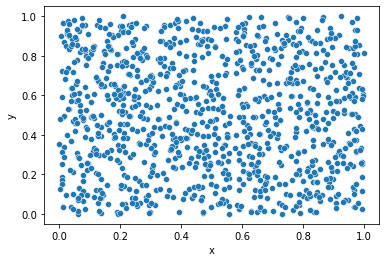

In [31]:
sns.scatterplot(data = data, x ='x', y= 'y')
plt.show()

In [80]:
# helper functions
def euclidean_distance(x, y):
    distance = 0
    for i in range(len(x)):
        distance += (x[i] - y[i])**2
    return distance**0.5

def choose_random_centroids(data, k):
    centroids = [[0 for _ in range(len(data.columns))] for _ in range(k)]
    for row in range(k):
        for col in range(len(data.columns)):
            centroids[row][col] = np.random.uniform(low = data[data.columns.values[col]].min(),
                                                    high = data[data.columns.values[col]].max(),
                                                    size = 1)[0]
    return centroids

def update_centroids(data, old_assigned_centroids, k):
    new_centroids = [[0 for _ in range(len(data.columns))] for _ in range(k)]
    # data points in each cluster
    total_cluster_points = [0 for _ in range(k)]
    for row in range(len(old_assigned_centroids)):
        total_cluster_points[old_assigned_centroids[row]] += 1
        for col in range(len(data.columns)):
            new_centroids[old_assigned_centroids[row]][col] += data.iloc[row][col]
    
    for i in range(k):
        for j in range(len(data.columns)):
            new_centroids[i][j] /= total_cluster_points[i]
    
    return new_centroids

def is_equal(lst1_2D, lst2_2D):
    for i in range(len(lst1_2D)):
        for j in range(len(lst1_2D[0])):
            if lst1_2D[i][j] != lst2_2D[i][j]:
                return False
    return True

def mini_distance_index(lst):
    mini_index = 0
    for i in range(len(lst)):
        if(lst[i] < lst[mini_index]):
            mini_index = i
    return mini_index

def kmeans(data, k = 3, max_iters = 200):
    # step 1: choosing ramdom centroids
    curr_centroids = choose_random_centroids(data, k)
    temp_data = data.copy()
    for _ in range(max_iters):
        old_assigned_centroids = []
        # step 2: find distances of data points from the centroids
        for row in range(len(data)):
            distances = []
            for c in range(k):
                distances.append(euclidean_distance(data.iloc[row], curr_centroids[c]))
            old_assigned_centroids.append(mini_distance_index(distances))
        
        temp_data['labels'] = np.array(old_assigned_centroids)
        print(f"Iteration: {_ + 1}")
        # visualizing Clusters
#         paletts = ['red', 'blue', 'green']
#         sns.scatterplot(data = temp_data, x = 'x', y = 'y', hue='labels')
        plt.scatter(temp_data['x'], y = temp_data['y'], c = np.array(old_assigned_centroids))
        plt.scatter(x = np.array(curr_centroids)[:,0], y = np.array(curr_centroids)[:,1],
                   marker = 'x', c = 'red')
        clear_output(wait = True)
        plt.show()
        # step 3: updating centroids based on the mean of each clusters
        new_centroids = update_centroids(data, old_assigned_centroids, k)

        if is_equal(curr_centroids, new_centroids):
            break
        else:
            curr_centroids = new_centroids    

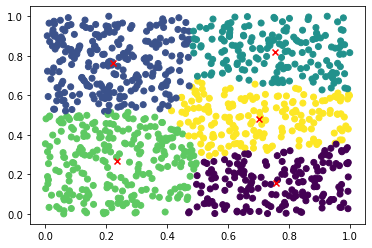

In [82]:
kmeans(data, k = 5)